In [41]:
import pandas as pd

# 데이터 로드
file_path = 'btc_15m_data_2018_to_2024-2024-10-10.csv'  # 파일 경로
btc_data = pd.read_csv(file_path)

# 데이터 구조 확인
print(btc_data.head())  # 첫 5행 확인
print(btc_data.info())  # 데이터 타입 및 결측치 확인

         Open time      Open      High       Low     Close      Volume  \
0  2018-01-01 0:00  13715.65  13715.65  13400.01  13556.15  123.616013   
1  2018-01-01 0:15  13533.75  13550.87  13402.00  13521.12   98.136430   
2  2018-01-01 0:30  13500.00  13545.37  13450.00  13470.41   79.904037   
3  2018-01-01 0:45  13494.65  13690.87  13450.00  13529.01  141.699719   
4  2018-01-01 1:00  13528.99  13571.74  13402.28  13445.63   72.537533   

  Close time  Quote asset volume  Number of trades  \
0    15:00.0        1.675545e+06              1572   
1    30:00.0        1.321757e+06              1461   
2    45:00.0        1.078825e+06              1000   
3    00:00.0        1.917783e+06              1195   
4    15:00.0        9.778198e+05               898   

   Taker buy base asset volume  Taker buy quote asset volume  
0                    63.227133                  8.576108e+05  
1                    47.686389                  6.422812e+05  
2                    43.710406           

In [27]:
# 결측값 개수 확인
print("결측값 개수:")
print(btc_data.isnull().sum())

# 결측값 제거 (전체 행 제거)
btc_data = btc_data.dropna()

# 결측값 확인
print("결측값 제거 후 데이터 크기:", btc_data.shape)


결측값 개수:
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
dtype: int64
결측값 제거 후 데이터 크기: (237003, 11)


In [28]:
# 잘못된 시간 값 수정 함수
def fix_close_time(time_str):
    try:
        if ":" in time_str:
            parts = time_str.split(":")
            minute = int(parts[0]) % 60  # 0~59 범위로 변환
            second = int(float(parts[1])) if len(parts) > 1 else 0
            return f"00:{minute:02}:{second:02}"  # 시간은 00으로 고정
        else:
            return "00:00:00"
    except Exception:
        return "00:00:00"

# Close time 수정
btc_data['Close time'] = btc_data['Close time'].apply(fix_close_time)

# Open time 날짜와 Close time 시간 결합
btc_data['Close time'] = btc_data['Open time'].str.split(" ").str[0] + " " + btc_data['Close time']
btc_data['Close time'] = pd.to_datetime(btc_data['Close time'], errors='coerce')

# Open time을 Datetime 형식으로 변환
btc_data['Open time'] = pd.to_datetime(btc_data['Open time'], errors='coerce')


In [29]:
# 파생 변수 생성
btc_data['Price Range'] = btc_data['High'] - btc_data['Low']
btc_data['Return'] = (btc_data['Close'] - btc_data['Open']) / btc_data['Open']
btc_data['Buy Ratio'] = btc_data['Taker buy base asset volume'] / btc_data['Volume']

# 결과 확인
print(btc_data[['Price Range', 'Return', 'Buy Ratio']].head())


   Price Range    Return  Buy Ratio
0       315.64 -0.011629   0.511480
1       148.87 -0.000933   0.485919
2        95.37 -0.002192   0.547036
3       240.87  0.002546   0.521511
4       169.46 -0.006162   0.472275


In [30]:
from sklearn.preprocessing import MinMaxScaler

# 정규화할 컬럼 선택
scaler = MinMaxScaler()
btc_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(
    btc_data[['Open', 'High', 'Low', 'Close', 'Volume']]
)

# 정규화 결과 확인
print(btc_data[['Open', 'High', 'Low', 'Close', 'Volume']].head())


       Open      High       Low     Close    Volume
0  0.149763  0.149299  0.145832  0.147487  0.003062
1  0.147180  0.146965  0.145860  0.146990  0.002431
2  0.146701  0.146888  0.146543  0.146270  0.001979
3  0.146625  0.148948  0.146543  0.147102  0.003510
4  0.147113  0.147261  0.145864  0.145918  0.001797


In [13]:
# 전처리된 데이터 저장
btc_data.to_csv('btc_data_cleaned.csv', index=False)
print("전처리 완료된 데이터가 'btc_data_cleaned.csv'로 저장되었습니다.")

전처리 완료된 데이터가 'btc_data_cleaned.csv'로 저장되었습니다.


In [31]:
# 기초 통계 확인
print(btc_data.describe())

                           Open time           Open           High  \
count                         237003  237003.000000  237003.000000   
mean   2021-05-23 20:01:39.143048192       0.326190       0.326171   
min              2018-01-01 00:00:00       0.000000       0.000000   
25%              2019-09-13 23:07:30       0.080350       0.080375   
50%              2021-05-24 14:30:00       0.250498       0.250492   
75%              2023-02-01 01:37:30       0.539288       0.539284   
max              2024-10-10 07:30:00       1.000000       1.000000   
std                              NaN       0.278318       0.278280   

                 Low          Close         Volume  \
count  237003.000000  237003.000000  237003.000000   
mean        0.326366       0.326183       0.018809   
min         0.000000       0.000000       0.000000   
25%         0.080345       0.080341       0.005611   
50%         0.250620       0.250488       0.009864   
75%         0.539196       0.539289       0.0

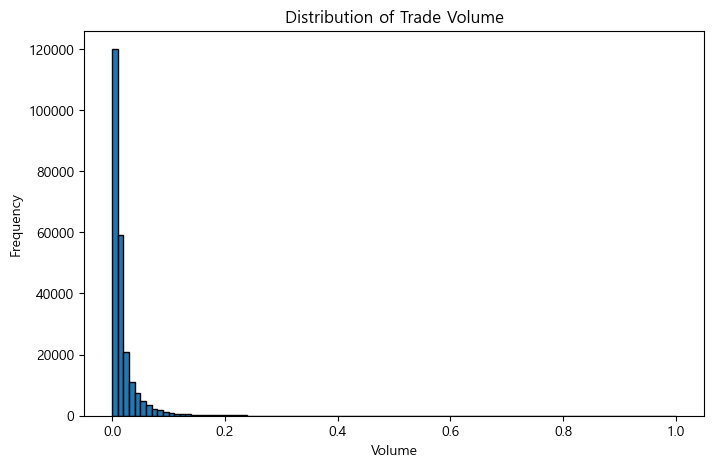

In [32]:
import matplotlib.pyplot as plt

# 거래량 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(btc_data['Volume'], bins=100, edgecolor='k')
plt.title('Distribution of Trade Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


In [34]:
# 거래량이 증가할 때 가격 변동성 확인 : 0.288.. (강한 상관관계는 아니다)
corr = btc_data['Volume'].corr(btc_data['Price Range'])
print(f"Correlation between Volume and Price Range: {corr}")

Correlation between Volume and Price Range: 0.2881050741249703


Correlation between Volume and Price Range in High Volume Periods: 0.08357401000124925


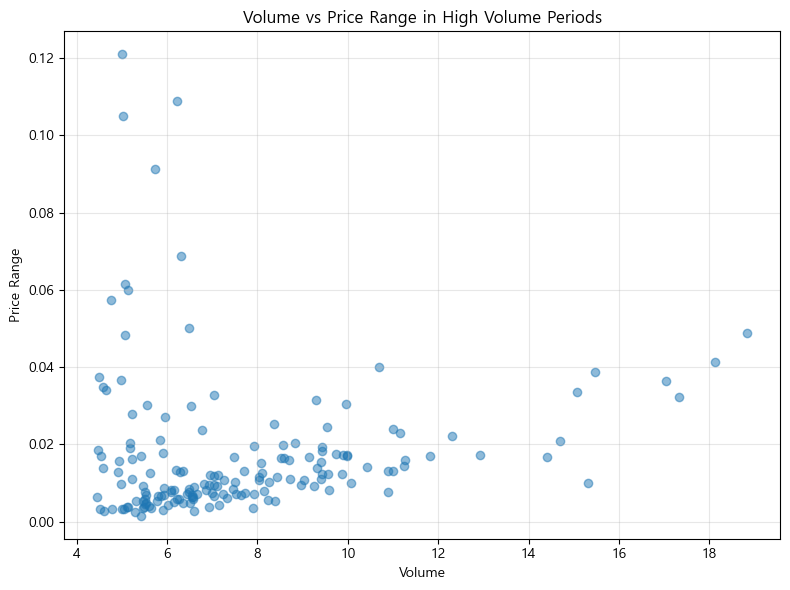

In [38]:
import matplotlib.pyplot as plt

# 거래량이 높은 기간을 필터링 (예: 거래량이 상위 10%에 해당하는 경우)
threshold = merged_data['Volume'].quantile(0.9)  # 상위 10% 기준
high_volume = merged_data[merged_data['Volume'] > threshold].copy()  # 명확히 복사본 생성

# 가격 변동폭 계산
high_volume['Price Range'] = high_volume['High'] - high_volume['Low']

# 거래량과 가격 변동폭의 상관관계 계산
corr_high_volume = high_volume['Volume'].corr(high_volume['Price Range'])
print(f"Correlation between Volume and Price Range in High Volume Periods: {corr_high_volume}")

# 산점도 시각화
plt.figure(figsize=(8, 6))
plt.scatter(high_volume['Volume'], high_volume['Price Range'], alpha=0.5)
plt.title('Volume vs Price Range in High Volume Periods')
plt.xlabel('Volume')
plt.ylabel('Price Range')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


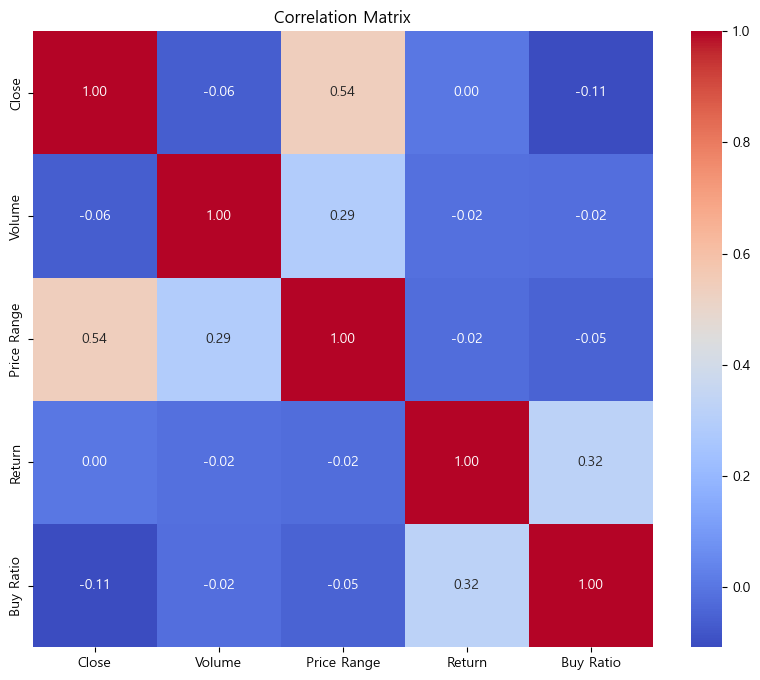

In [39]:
import seaborn as sns

# 상관 행렬 계산 및 히트맵 시각화
correlation_matrix = btc_data[['Close', 'Volume', 'Price Range', 'Return', 'Buy Ratio']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


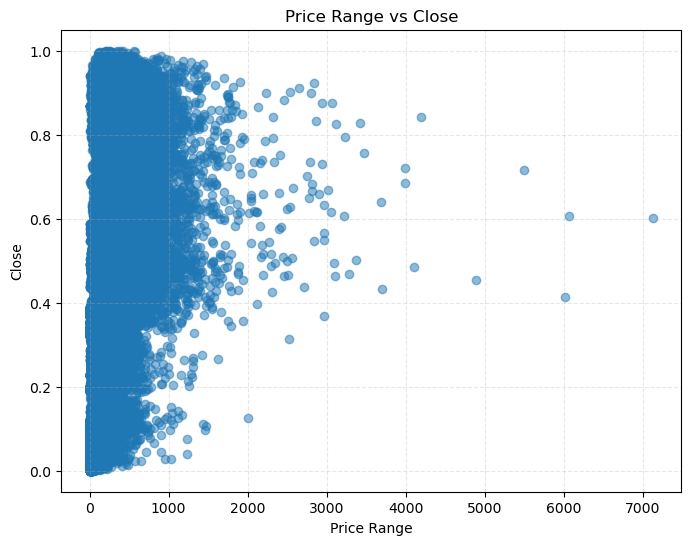

In [17]:
import matplotlib.pyplot as plt

# 산점도 시각화
plt.figure(figsize=(8, 6))
plt.scatter(btc_data['Price Range'], btc_data['Close'], alpha=0.5)
plt.title('Price Range vs Close')
plt.xlabel('Price Range')
plt.ylabel('Close')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

In [18]:
# 상승과 하락 구간 나누기
rising_periods = btc_data[btc_data['Return'] > 0]
falling_periods = btc_data[btc_data['Return'] < 0]

# 상승 구간 평균
print("Rising Periods Stats:")
print(rising_periods.describe())

# 하락 구간 평균
print("\nFalling Periods Stats:")
print(falling_periods.describe())


Rising Periods Stats:
                           Open time           Open           High  \
count                         119299  119299.000000  119299.000000   
mean   2021-05-22 23:14:08.579619328       0.324575       0.324985   
min              2018-01-01 00:45:00       0.000000       0.000000   
25%              2019-09-11 14:37:30       0.079887       0.080100   
50%              2021-05-21 08:15:00       0.249023       0.249201   
75%              2023-01-30 05:52:30       0.535360       0.536806   
max              2024-10-10 06:45:00       0.998648       0.998315   
std                              NaN       0.277651       0.277920   

                 Low          Close         Volume  \
count  119299.000000  119299.000000  119299.000000   
mean        0.325198       0.325397       0.018675   
min         0.000000       0.000058       0.000115   
25%         0.080060       0.080221       0.005578   
50%         0.249529       0.249556       0.009820   
75%         0.536052   

In [20]:
# 결측값이 포함된 행 제거
X = X.dropna()
y = y[X.index]  # X에서 제거된 행과 동일하게 y 값도 제거

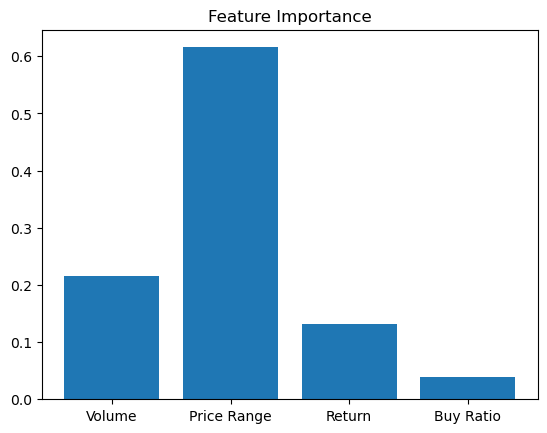

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 독립 변수와 종속 변수 설정
X = btc_data[['Volume', 'Price Range', 'Return', 'Buy Ratio']]
y = btc_data['Close']

# 결측값 대체 (평균값 사용)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 변수 중요도 시각화
importances = model.feature_importances_
columns = ['Volume', 'Price Range', 'Return', 'Buy Ratio']
plt.bar(columns, importances)
plt.title('Feature Importance')
plt.show()


### 외부 요인 분석

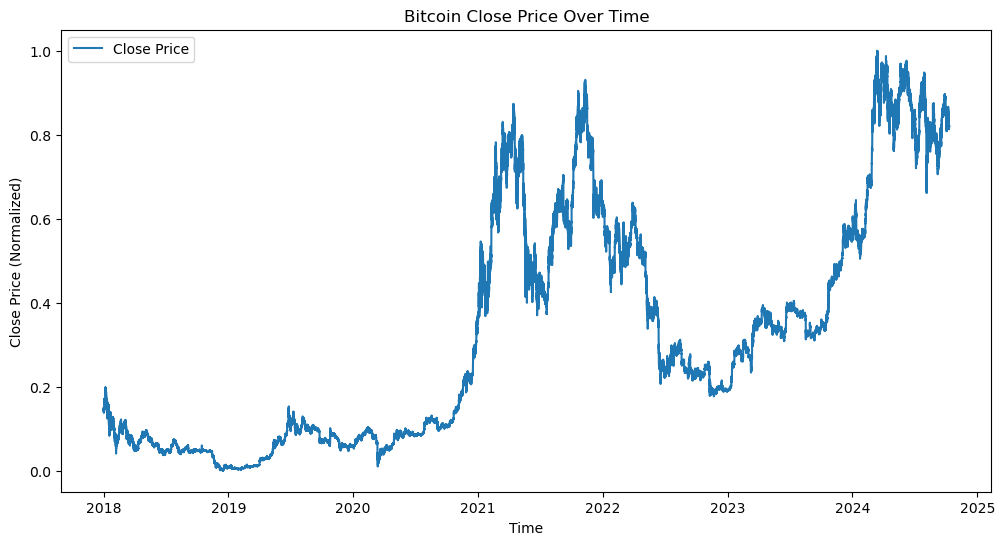

In [33]:
# 가격 시계열 시각화
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Open time'], btc_data['Close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price (Normalized)')
plt.legend()
plt.show()

In [22]:
# 코스피 데이터 파일 불러오기
kospi_file_path = '코스피지수 과거 데이터.csv'
kospi_data = pd.read_csv(kospi_file_path)

# 비트코인 데이터 파일 불러오기
btc_file_path = 'btc_data_cleaned.csv'
btc_data = pd.read_csv(btc_file_path)

# 코스피 데이터의 숫자 열에서 쉼표 제거 및 float 형식으로 변환
for col in ['종가', '시가', '고가', '저가', '거래량']:
    kospi_data[col] = kospi_data[col].replace({',': '', 'K': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True).astype(float)

# 날짜 열을 datetime 형식으로 변환하여 병합 준비
kospi_data['날짜'] = pd.to_datetime(kospi_data['날짜'])
btc_data['Open time'] = pd.to_datetime(btc_data['Open time'])

# 비트코인 데이터를 일별로 집계
btc_daily = btc_data.resample('D', on='Open time').agg({
    'Open': 'first',   # 해당 날짜의 첫 번째 Open 값
    'High': 'max',     # 해당 날짜의 최고가
    'Low': 'min',      # 해당 날짜의 최저가
    'Close': 'last',   # 해당 날짜의 마지막 Close 값
    'Volume': 'sum'    # 해당 날짜의 총 거래량
}).reset_index()

# 열 이름을 명확히 하기 위해 변경
btc_daily.rename(columns={'Open time': '날짜', 'Close': 'BTC 종가'}, inplace=True)

# 날짜를 기준으로 코스피 데이터와 비트코인 데이터를 병합
merged_data = pd.merge(kospi_data, btc_daily, on='날짜', how='inner')

# 코스피 종가와 비트코인 종가 간의 상관 계수 계산
correlation = merged_data[['종가', 'BTC 종가']].corr()

# 병합된 데이터 출력
print("병합된 데이터:")
print(merged_data.head())

# 코스피 종가와 비트코인 종가 간의 상관 계수 출력
print("\n코스피 종가와 비트코인 종가 간의 상관 계수:")
print(correlation)


병합된 데이터:
          날짜       종가       시가       고가       저가          거래량    변동 %  \
0 2024-10-10  2599.16  2611.65  2613.61  2596.86  618560000.0   0.19%   
1 2024-10-08  2594.36  2592.65  2601.96  2581.79  318240000.0  -0.61%   
2 2024-10-07  2610.38  2579.20  2611.93  2561.46  343670000.0   1.58%   
3 2024-10-04  2569.71  2563.70  2585.59  2555.57  414330000.0   0.31%   
4 2024-10-02  2561.69  2566.55  2591.61  2555.46  351000000.0  -1.22%   

       Open      High       Low    BTC 종가    Volume  
0  0.815851  0.821147  0.814290  0.820788  0.103709  
1  0.838394  0.850189  0.835719  0.837490  0.488024  
2  0.846854  0.868293  0.839530  0.838392  0.643183  
3  0.817508  0.840060  0.815783  0.836433  0.527469  
4  0.818249  0.838721  0.809236  0.816037  0.781115  

코스피 종가와 비트코인 종가 간의 상관 계수:
              종가    BTC 종가
종가      1.000000  0.757983
BTC 종가  0.757983  1.000000

병합된 데이터를 'merged_kospi_bitcoin_data.csv'로 저장했습니다.


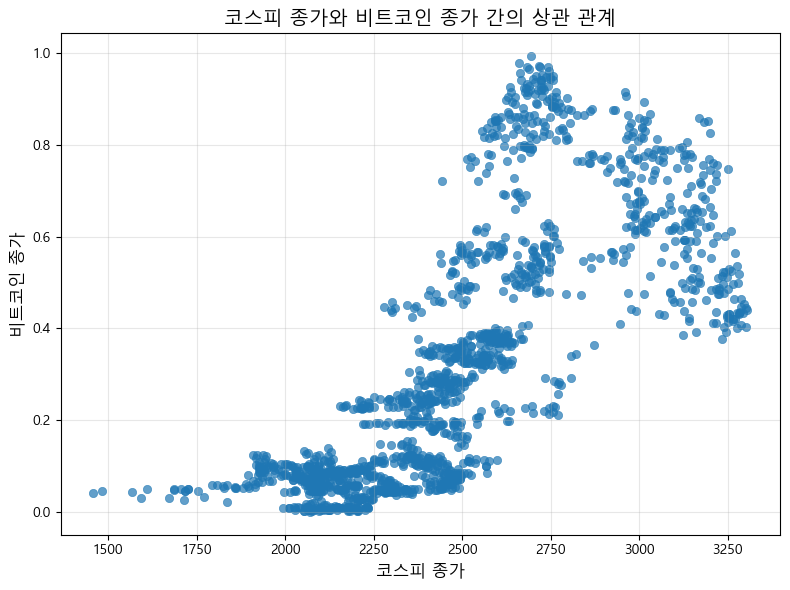

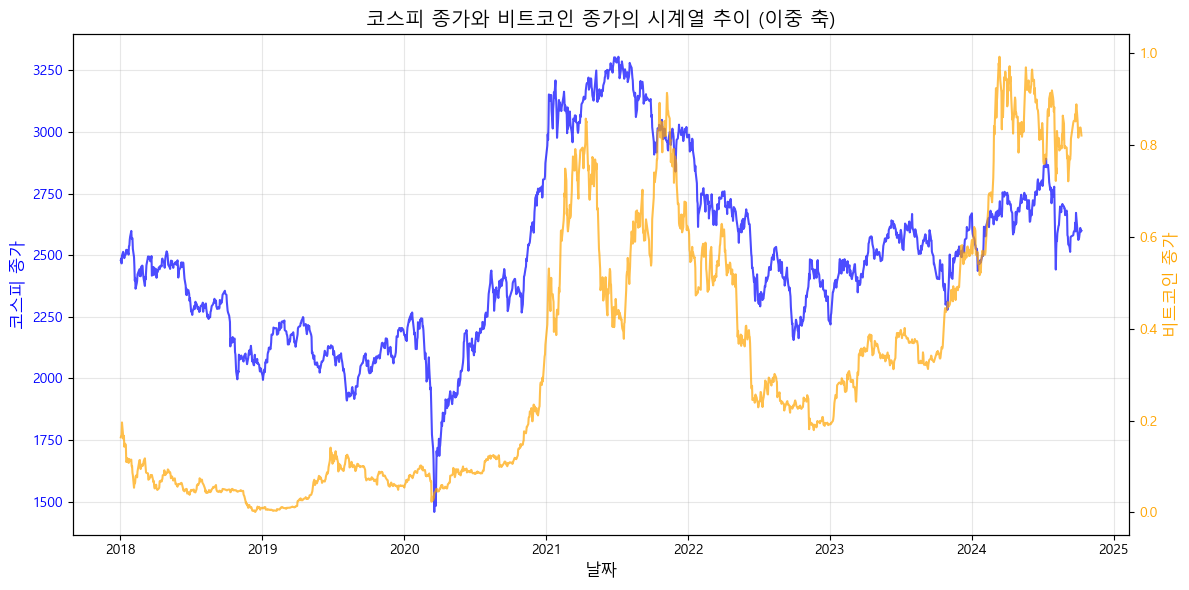

In [40]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 맑은 고딕 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 1. 산점도 (Scatter Plot)로 상관성 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='종가', y='BTC 종가', data=merged_data, alpha=0.7, edgecolor=None)
plt.title('코스피 종가와 비트코인 종가 간의 상관 관계', fontsize=14)
plt.xlabel('코스피 종가', fontsize=12)
plt.ylabel('비트코인 종가', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 이중 축 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축: 코스피 종가
ax1.plot(merged_data['날짜'], merged_data['종가'], label='코스피 종가', color='blue', alpha=0.7)
ax1.set_xlabel('날짜', fontsize=12)
ax1.set_ylabel('코스피 종가', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(alpha=0.3)

# 두 번째 축: 비트코인 종가
ax2 = ax1.twinx()  # 두 번째 y축 공유
ax2.plot(merged_data['날짜'], merged_data['BTC 종가'], label='비트코인 종가', color='orange', alpha=0.7)
ax2.set_ylabel('비트코인 종가', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 그래프 제목 및 레이아웃
plt.title('코스피 종가와 비트코인 종가의 시계열 추이 (이중 축)', fontsize=14)
fig.tight_layout()
plt.show()


### 구글 트렌드 'Bitcoin' 관심도
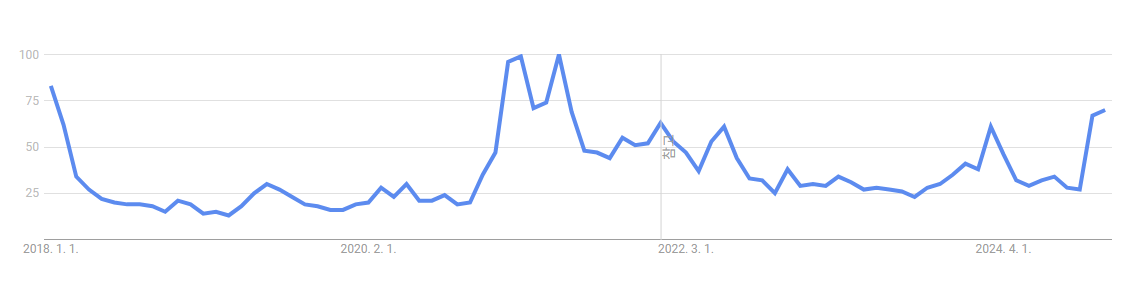